In [1]:
import sys
sys.path.append("./../")

import numpy as np
import matplotlib.pyplot as plt
from torchvision.utils import make_grid
from torch.utils.data import DataLoader

from modules.vqvae.model import VQVAE
from datasets.cub import CubDataset
from datasets.common import collate_fn
from config import Config

In [2]:
def show(img, figsize=(14, 10)):
    plt.figure(figsize=figsize)
    npimg = img.numpy()
    fig = plt.imshow(np.transpose(npimg, (1,2,0)), interpolation='nearest')
    fig.axes.get_xaxis().set_visible(False)
    fig.axes.get_yaxis().set_visible(False)
    plt.show()

In [3]:
CONFIG = Config(local=True, model_path="models/vqvae_i128_e256x8192/")
CONFIG.load_config()

CONFIG.BATCH_SIZE = 8

train_dataset = CubDataset(root_img_path=CONFIG.root_img_path,
                           root_text_path=CONFIG.root_text_path,
                           imgs_list_file_path=CONFIG.imgs_list_file_path,
                           img_size=CONFIG.img_size)
train_loader = DataLoader(dataset=train_dataset,
                          batch_size=CONFIG.BATCH_SIZE,
                          shuffle=True,
                          collate_fn=collate_fn)

In [4]:
CONFIG.print_config_info()

BATCH_SIZE                              8                                       
DEVICE                                  cuda                                    
LR                                      0.01                                    
LR_gamma                                0.1                                     
NUM_EPOCHS                              3000                                    
img_size                                128                                     
imgs_list_file_path                     /home/andrey/Aalto/thesis/TA-VQVAE/data/CUB/CUB_200_2011/images.txt
load_vae_path                           /home/andrey/Aalto/thesis/TA-VQVAE/models/vqvae_i128_e256x8192/
quantizer_LR                            0.1                                     
root_img_path                           /home/andrey/Aalto/thesis/TA-VQVAE/data/CUB/CUB_200_2011/images
root_text_path                          /home/andrey/Aalto/thesis/TA-VQVAE/data/CUB/text
save_model_path             

In [5]:
model = VQVAE(num_embeddings=CONFIG.vqvae_num_embeddings,
              embedding_dim=CONFIG.vqvae_embedding_dim,
              commitment_cost=CONFIG.vqvae_commitment_cost,
              decay=CONFIG.vqvae_decay,
              num_x2downsamples=CONFIG.vqvae_num_x2downsamples,
              num_resid_downsample_layers=CONFIG.vqvae_num_downsample_residual_layers,
              num_resid_bottleneck_layers=CONFIG.vqvae_num_bottleneck_residual_layers,
              use_batch_norm=True,
              use_conv1x1=True)

model.load_model(root_path=CONFIG.save_model_path, model_name="VQVAE")
_ = model.eval()

In [6]:
imgs, _ = next(iter(train_loader))

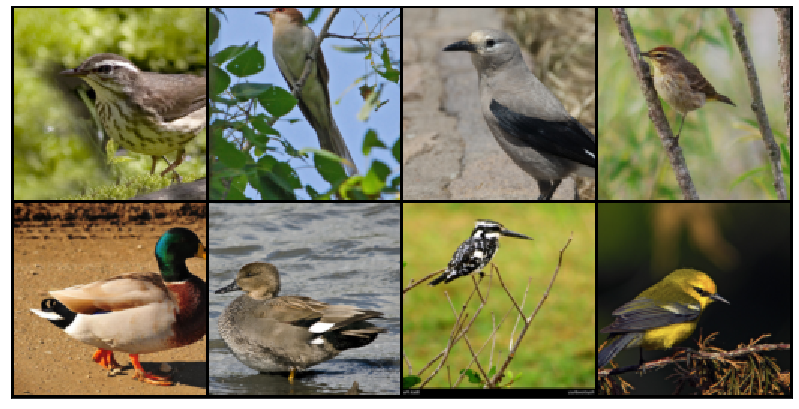

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


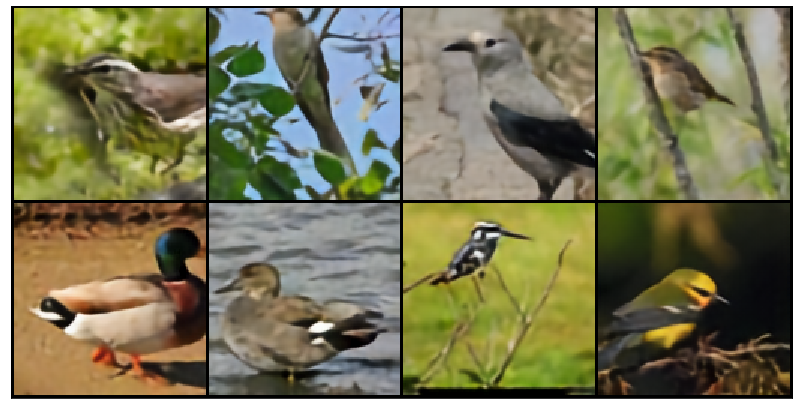

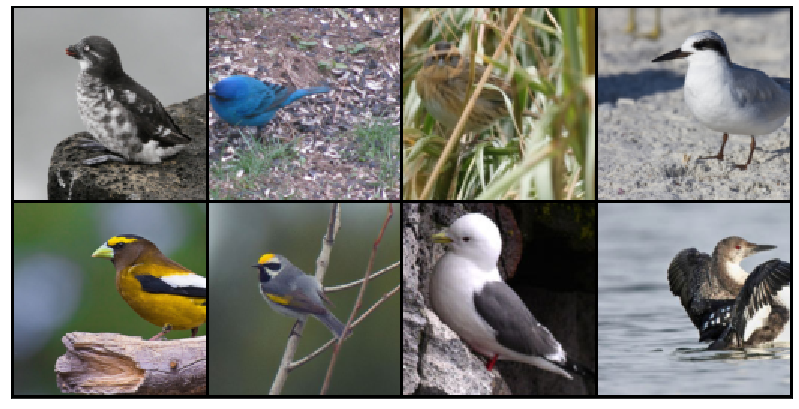

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


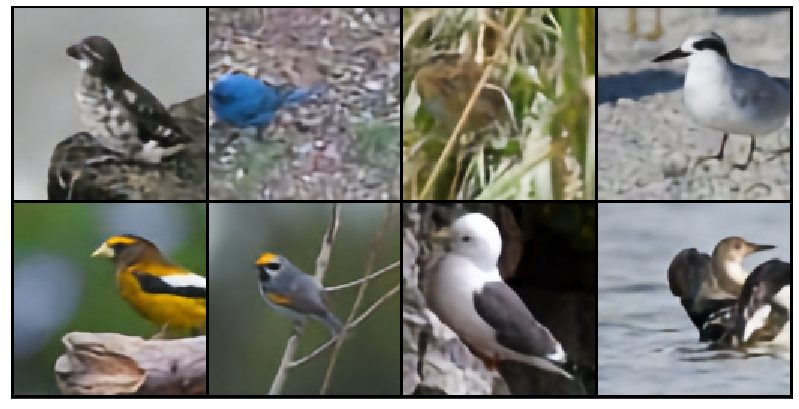

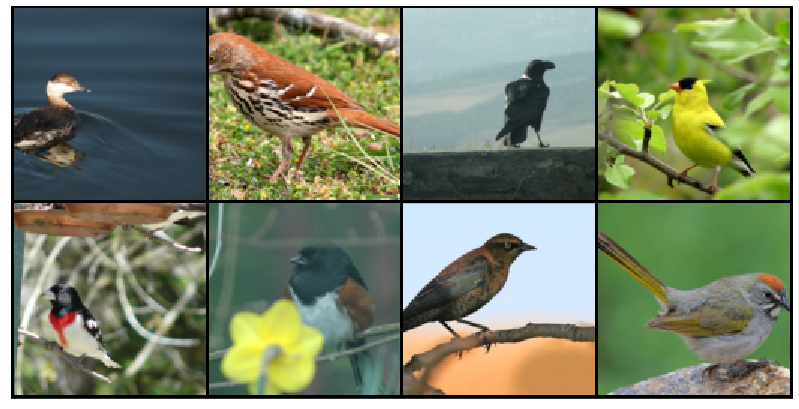

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


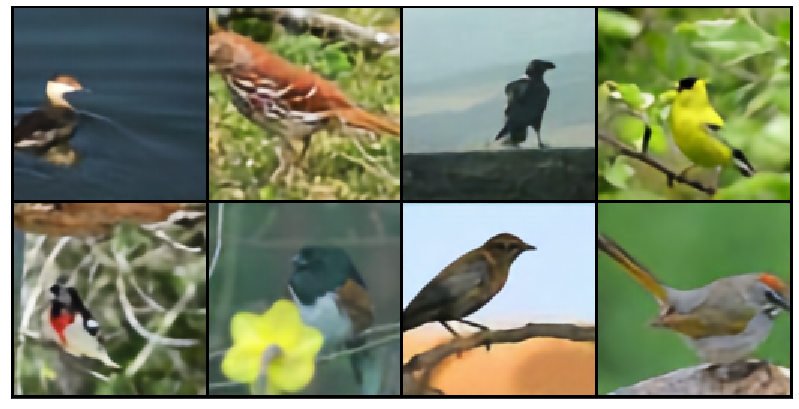

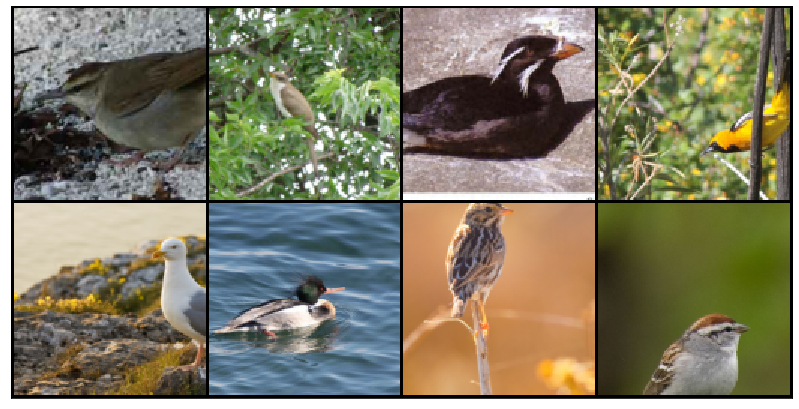

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


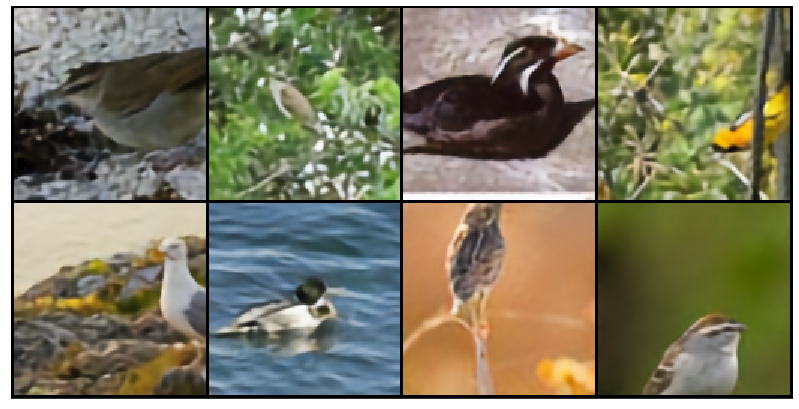

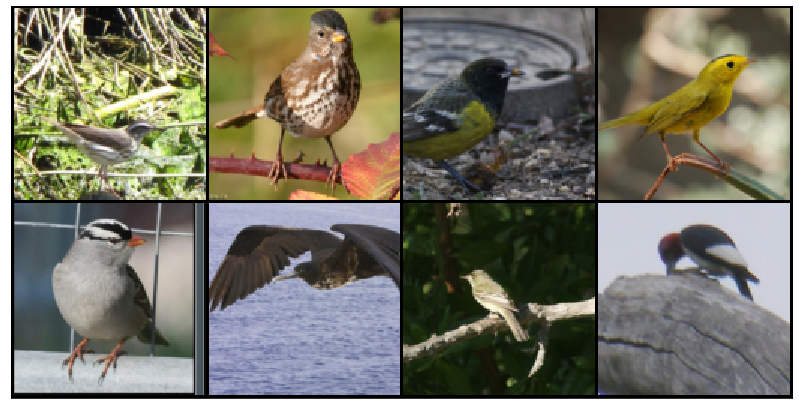

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


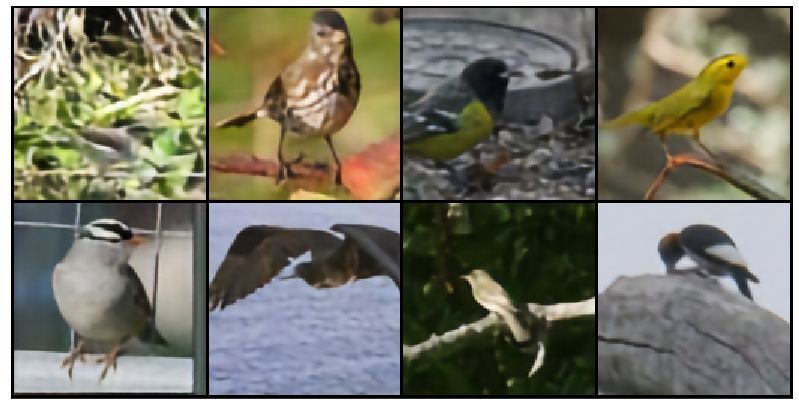

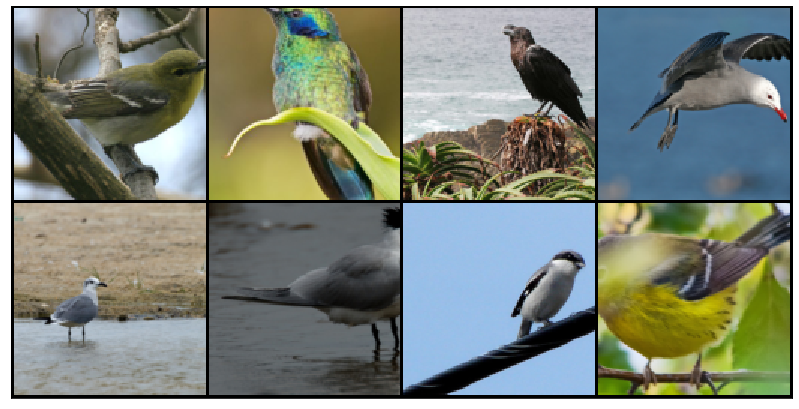

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


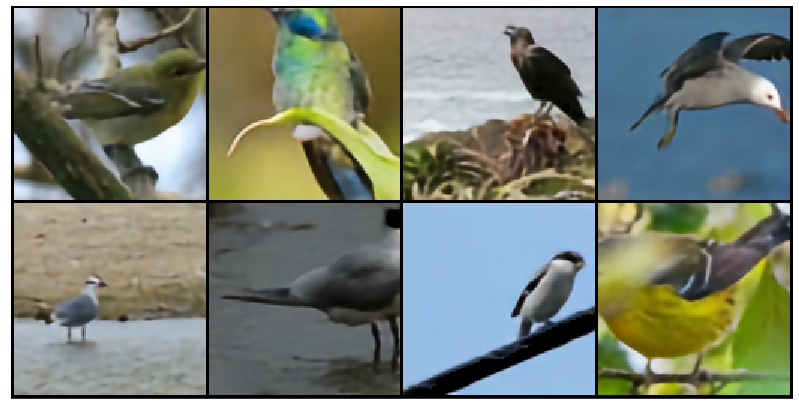

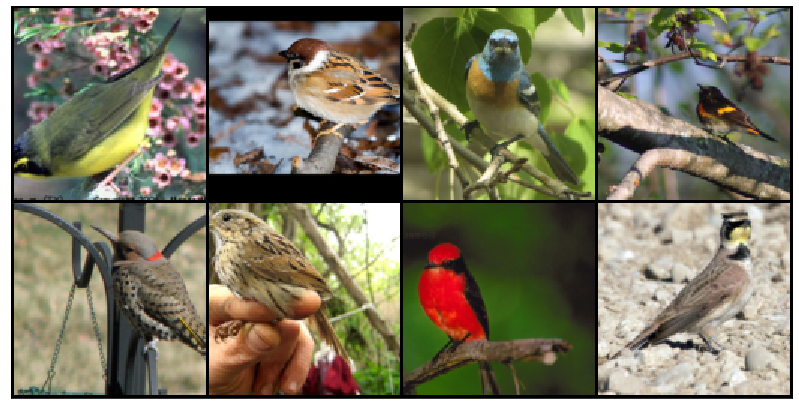

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


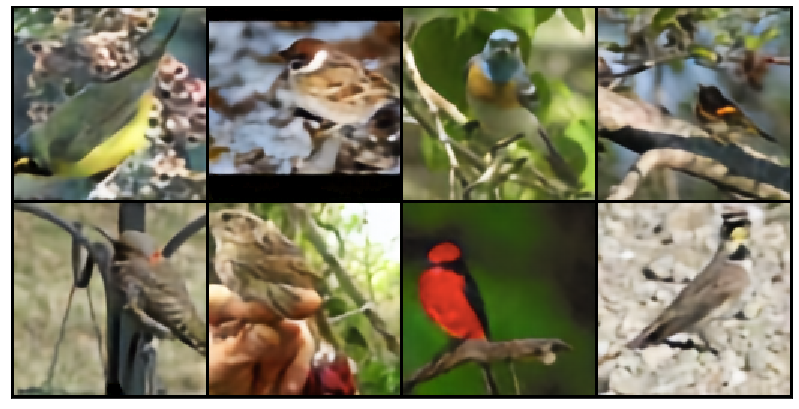

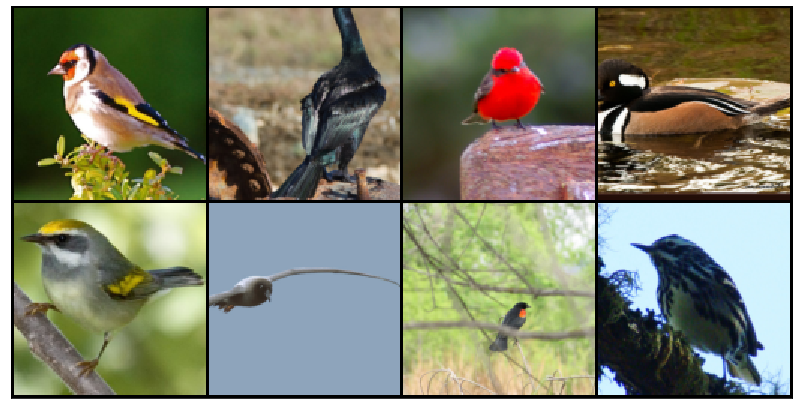

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


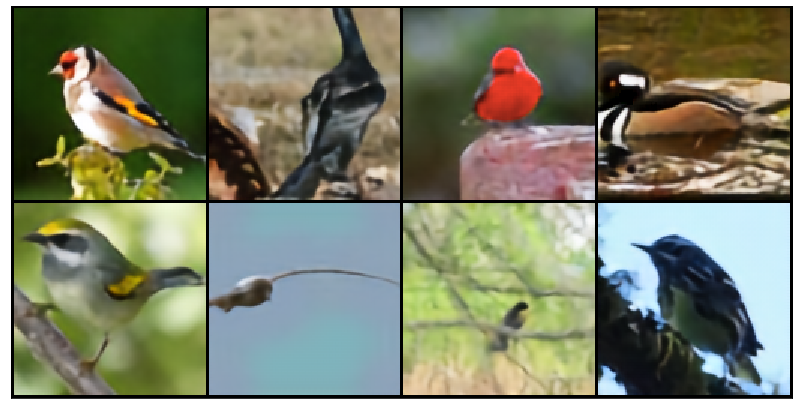

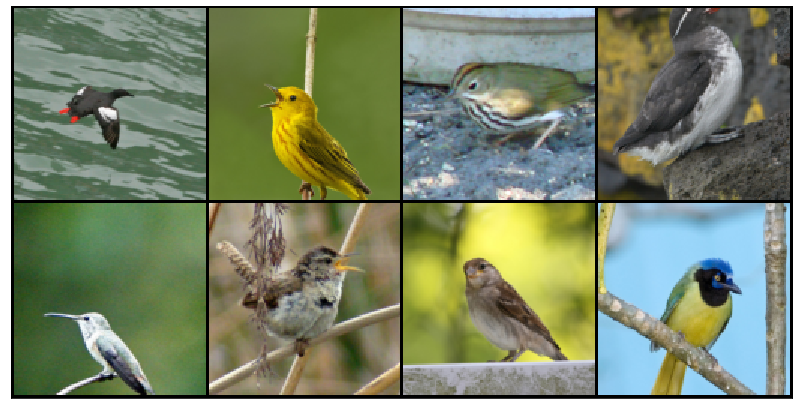

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


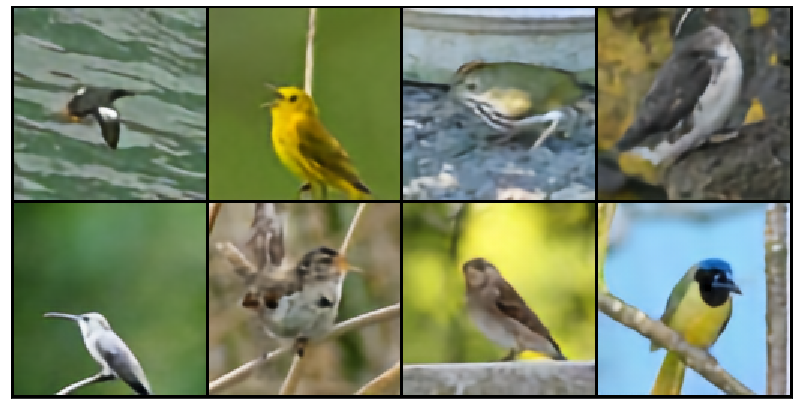

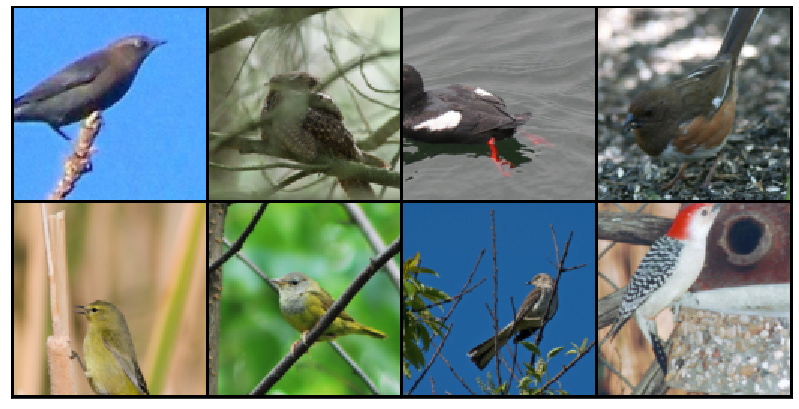

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


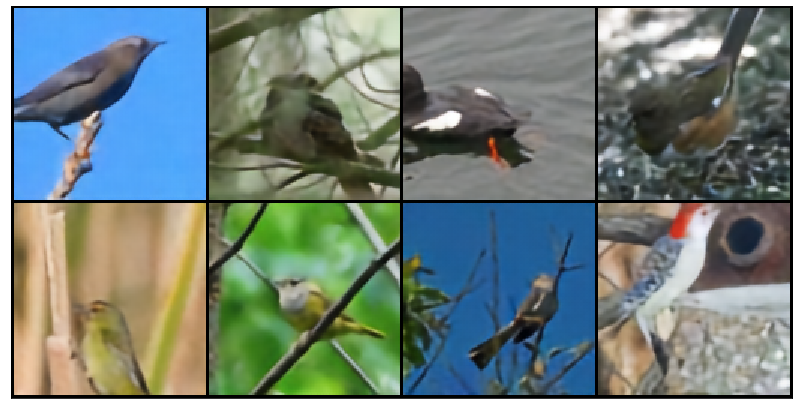

In [7]:
for i in range(10):
    
    imgs, _ = next(iter(train_loader))

    show(make_grid(imgs.data, nrow=4))

    _, quantized, x_recon, _ = model(imgs)

    show(make_grid(x_recon.data, nrow=4))

In [8]:
quantized, (encodings, encoding_codes) = model.encode_and_quantize(imgs)
quantized.shape

torch.Size([8, 256, 32, 32])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


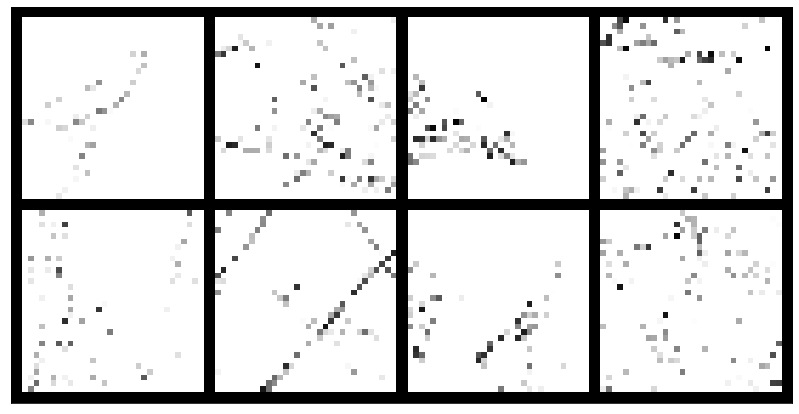

In [9]:
show(make_grid(encoding_codes.unsqueeze(1).data, nrow=4))